In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
plt.rc('text', usetex = True)

from ast import literal_eval as liteval
import numpy as np
import os

import sys
sys.path.insert(0, os.getcwd().removesuffix("/lane"))
from file_utils import readData, copyList, readData2D
sys.path.pop(0)

dirpath = "//media/ashwin/One Touch/ashwin_md/Apr2025/lane/lmp"
figpath = "/home/ashwin/Desktop/ashwin_md/LD/imgs/Apr2025/lane"

In [26]:
lw = 1
ms = 2
colors = ["blue", "green", "orange", "red", "mediumorchid", "orangered"]

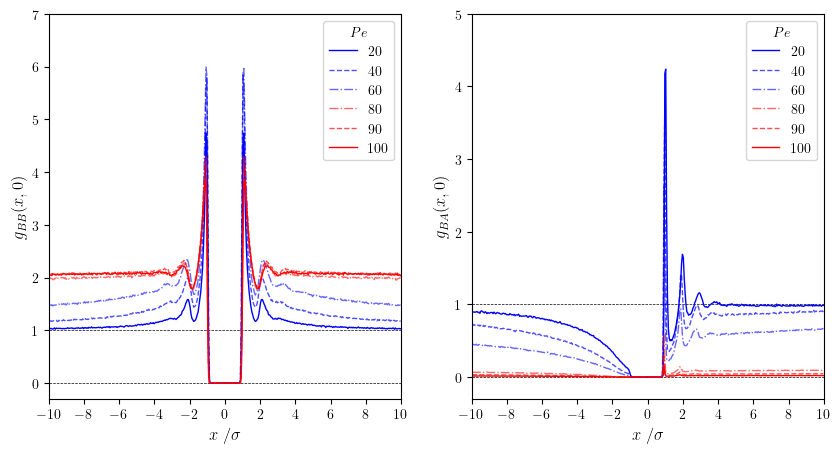

In [91]:
nr_list = [22, 23, 24, 25, 26, 27]
Pe_list = [20, 40, 60, 80, 90, 100]
color = ["b", "b", "b", "r", "r", "r"]
alp = [1, 0.7, 0.6, 0.6, 0.7, 1]
ls = ["-", "--", "-.", "-.", "--", "-"]

fig1, ax1 = plt.subplots(1, 2, figsize = (10, 5))

for i in range(len(ax1)):
    ax1[i].axhline(y = 1, xmin = 0, xmax = 1, ls = "--", color = "k", lw = 0.5)
    ax1[i].axhline(y = 0, xmin = 0, xmax = 1, ls = "--", color = "k", lw = 0.5)

for i in range(len(nr_list)):
    [rdfData, fields] = readData(os.path.join(dirpath, "Data{nr}".format(nr = nr_list[i]), "laneRDF_1D_asymm.dat"), 2)

    xn = rdfData[1]
    g_all = rdfData[2]
    gAA = rdfData[3]
    gAB = rdfData[4]
    gBA = rdfData[5]
    gBB = rdfData[6]

    ax1[0].plot(xn, gBB, ls = ls[i], color = color[i], lw = 1, alpha = alp[i], label = r"${pe}$".format(pe = Pe_list[i]))
    ax1[1].plot(xn, gBA, ls = ls[i], color = color[i], lw = 1, alpha = alp[i], label = r"${pe}$".format(pe = Pe_list[i]))

ax1[0].set_ylabel(r"$g_{BB} (x, 0)$", fontsize = 12)
ax1[1].set_ylabel(r"$g_{BA} (x, 0)$", fontsize = 12)
ax1[0].set(xlim = (-10, 10), ylim = (-0.3, 7))
ax1[1].set(xlim = (-10, 10), ylim = (-0.3, 5))
ax1[0].set_yticks(np.arange(0, 7.5, 1))
ax1[1].set_yticks(np.arange(0, 5.5, 1))

for i in range(len(ax1)):
    ax1[i].set_xticks(np.arange(-10, 11, 2))
    ax1[i].set_xlabel(r"$x ~/\sigma$", fontsize = 12)
    ax1[i].legend(title = r"$Pe$", ncols = 1)

fig1.savefig(os.path.join(figpath, "RDF6.png"), dpi = 500, bbox_inches = "tight")

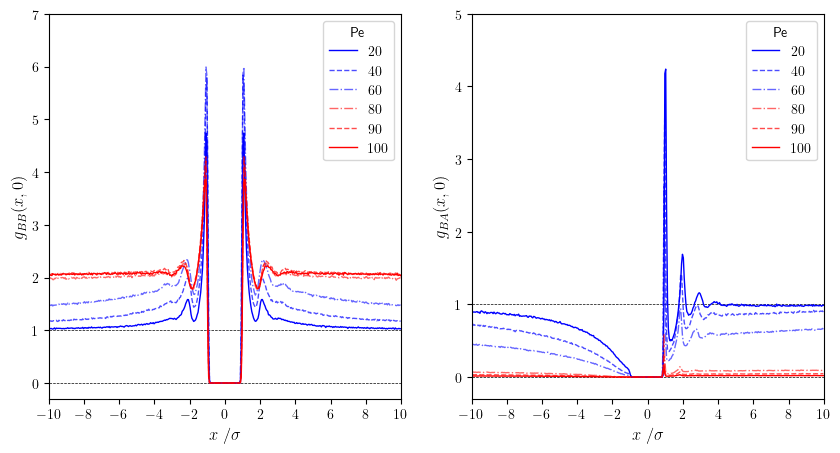

In [90]:
nr_list = [22, 23, 24, 25, 26, 27]
Pe_list = [20, 40, 60, 80, 90, 100]
color = ["b", "b", "b", "r", "r", "r"]
alp = [1, 0.7, 0.6, 0.6, 0.7, 1]
ls = ["-", "--", "-.", "-.", "--", "-"]

fig1, ax1 = plt.subplots(1, 2, figsize = (10, 5))

for i in range(len(ax1)):
    ax1[i].axhline(y = 1, xmin = 0, xmax = 1, ls = "--", color = "k", lw = 0.5)
    ax1[i].axhline(y = 0, xmin = 0, xmax = 1, ls = "--", color = "k", lw = 0.5)

for i in range(len(nr_list)):
    [rdfData, fields] = readData(os.path.join(dirpath, "Data{nr}".format(nr = nr_list[i]), "laneRDF_1D_asymm.dat"), 2)

    xn = rdfData[1]
    g_all = rdfData[2]
    gAA = rdfData[3]
    gAB = rdfData[4]
    gBA = rdfData[5]
    gBB = rdfData[6]

    ax1[0].plot(xn, gBB, ls = ls[i], color = color[i], lw = 1, alpha = alp[i], label = r"${pe}$".format(pe = Pe_list[i]))
    ax1[1].plot(xn, gBA, ls = ls[i], color = color[i], lw = 1, alpha = alp[i], label = r"${pe}$".format(pe = Pe_list[i]))

ax1[0].set_ylabel(r"$g_{BB} (x, 0)$", fontsize = 12)
ax1[1].set_ylabel(r"$g_{BA} (x, 0)$", fontsize = 12)
ax1[0].set(xlim = (-10, 10), ylim = (-0.3, 7))
ax1[1].set(xlim = (-10, 10), ylim = (-0.3, 5))
ax1[0].set_yticks(np.arange(0, 7.5, 1))
ax1[1].set_yticks(np.arange(0, 5.5, 1))

for i in range(len(ax1)):
    ax1[i].set_xticks(np.arange(-10, 11, 2))
    ax1[i].set_xlabel(r"$x ~/\sigma$", fontsize = 12)
    ax1[i].legend(title = r"$Pe$", ncols = 1)

0.0 6.010975


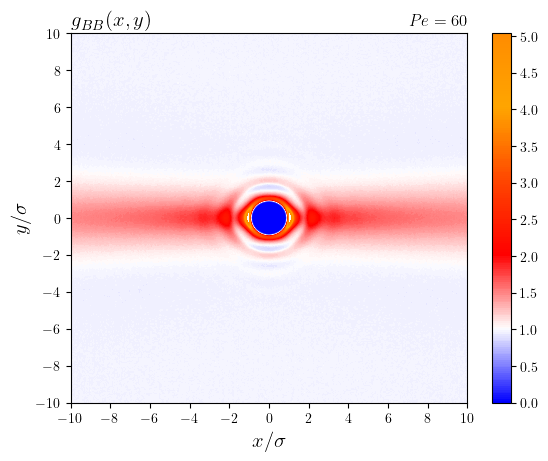

In [70]:
# Plot g(x, y)

colors = ["blue", "white", "red", "orangered",  "orange", "darkorange"]
cmap = clr.LinearSegmentedColormap.from_list("bwro", colors, N = 256)

rcutx = 10
rcuty = 10
binWx = 0.05
binWy = 0.05
nRows = int(2*rcutx/binWx)
nCols = int(2*rcuty/binWy)

fig1, ax1 = plt.subplots()

fpath = os.path.join(dirpath, "Data24", "lanerdf_2D.dat")
rdf = readData2D(fpath, 5, nRows, nCols)

z = rdf[4]
zmin = 0
zmax = 5.04

levels = np.linspace(zmin, zmax, 200)

print(z.min(), z.max())
cs = ax1.contourf(np.linspace(-rcutx, rcutx, nRows), np.linspace(-rcuty, rcuty, nCols), z.transpose(), levels = levels, cmap = cmap)

cbar = fig1.colorbar(cs, ticks = np.arange(zmin, zmax+0.1, 0.5))

ax1.set_xlabel(r"$x/\sigma$", fontsize = 15)
ax1.set_ylabel(r"$y/\sigma$", fontsize = 15)
ax1.set_xticks(np.arange(-rcutx, rcutx + 1.0, 2.0))
ax1.set_yticks(np.arange(-rcuty, rcuty + 1.0, 2.0))
ax1.set_title(r"$g_{BB}(x, y)$", loc = "left", fontsize = 15)
ax1.set_title(r"$Pe = 60$", loc = "right", fontsize = 12)

# fig1.savefig(os.path.join(figpath, "rdf_nr24_BB.png"), dpi = 500, bbox_inches = "tight")